In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
TestingData = pd.read_csv("D:\\semester 4\\data mining\\final project\\Testing.csv")

In [4]:
TrainingData = pd.read_csv("D:\\semester 4\\data mining\\final project\\Training.csv")


In [5]:
TestingData.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
TrainingData.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
TrainingData = TrainingData.drop(["Unnamed: 133"],axis=1)


In [8]:
train=TrainingData.drop(['prognosis'],axis=1)
(train[train.columns]<0).sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [9]:
test=TestingData.drop(['prognosis'],axis=1)
(test[test.columns]<0).sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

In [10]:
TrainingData['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [11]:
TrainingData.isnull().sum() 

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
TestingData.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [13]:
TestingData.shape

(42, 133)

In [14]:
TrainingData.shape

(4920, 133)

In [15]:
def get_sub_dataframe(TrainingData:pd.DataFrame, prognosis:str) -> pd.DataFrame:
    val, fet = [],[]
    df_after_selection = TrainingData[TrainingData['prognosis']== prognosis ]
    val_df = df_after_selection.iloc[:,:-1]
    mat = [[val_df[i].sum(),i] for i in val_df.columns if val_df[i].sum()!=0]
    for i in mat:
        val.append(i[0])
        fet.append(i[1])
    data = {'fet': fet, 'val': val}
    data = pd.DataFrame.from_dict(data)
    return data

In [16]:
Fungal_infection = get_sub_dataframe(TrainingData, 'Fungal infection')
fet = list(Fungal_infection['fet'])
val = list(Fungal_infection['val'])

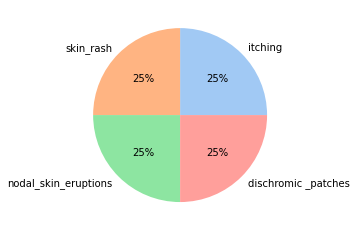

In [17]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

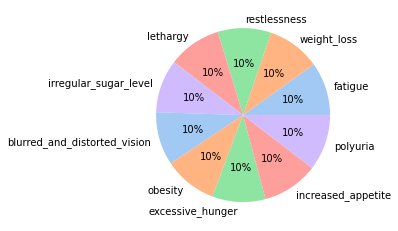

In [18]:
data = get_sub_dataframe(TrainingData, 'Diabetes ')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

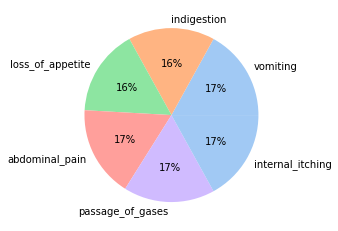

In [19]:
data = get_sub_dataframe(TrainingData, 'Peptic ulcer diseae')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

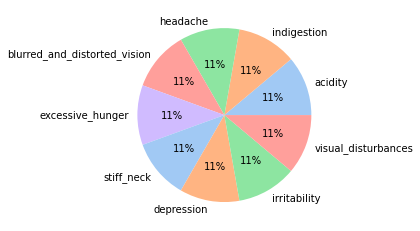

<AxesSubplot:xlabel='val', ylabel='fet'>

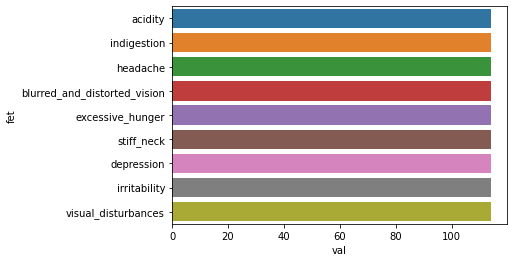

In [20]:
data = get_sub_dataframe(TrainingData, 'Migraine')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.barplot(data=data, x="val", y="fet")

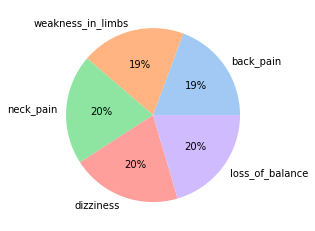

<AxesSubplot:xlabel='val', ylabel='fet'>

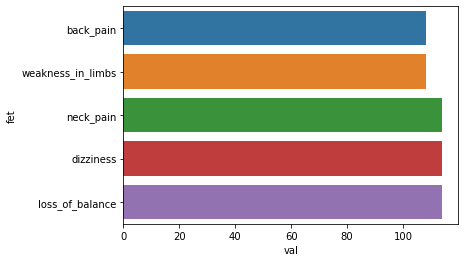

In [21]:
data = get_sub_dataframe(TrainingData, 'Cervical spondylosis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.barplot(data=data, x="val", y="fet")

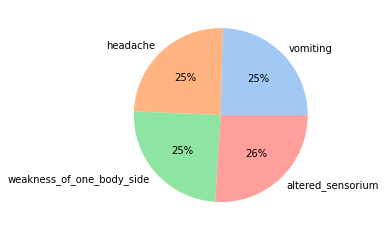

In [22]:
data = get_sub_dataframe(TrainingData, 'Paralysis (brain hemorrhage)')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

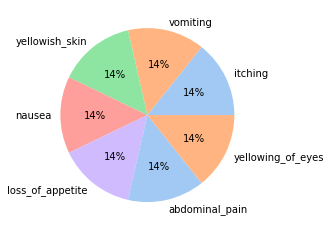

<AxesSubplot:xlabel='val', ylabel='fet'>

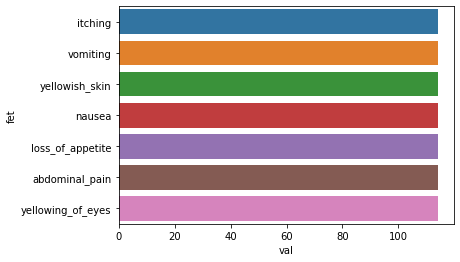

In [23]:
data = get_sub_dataframe(TrainingData, 'Chronic cholestasis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.barplot(data=data, x="val", y="fet")

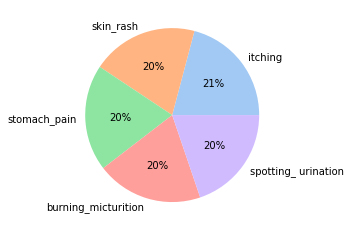

In [24]:
data = get_sub_dataframe(TrainingData, 'Drug Reaction')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

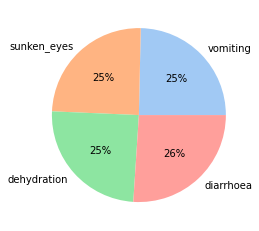

In [25]:
data = get_sub_dataframe(TrainingData, 'Gastroenteritis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

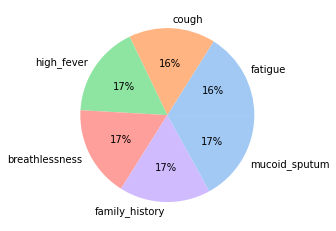

In [26]:
data = get_sub_dataframe(TrainingData, 'Bronchial Asthma')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

In [27]:
X = TrainingData.drop('prognosis', axis=1)
y = TrainingData['prognosis']

In [28]:
#We will be splitting the data into 80:20 format  80% of the dataset will be used for training the model 
#and 20% of the data will be used to evaluate the performance of the models.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3936, 132), (984, 132), (3936,), (984,))

In [29]:
#After splitting the data, we will be now working on the modeling part
# cross-validation is a robust measure to prevent overfitting.
#We will be using K-Fold cross-validation to evaluate the machine-learning models
#K-Fold cross-validation is one of the cross-validation techniques in which the whole dataset is split into k number of subsets,
#also known as folds, then training of the model is performed on the k-1 subsets
#and the remaining one subset is used to evaluate the model performance.
#we need to partition the data into k folds. Then,
#we iteratively train the algorithm on k-1 folds while using the remaining holdout fold as the test set.
def cv_scoring(estimator, X, y):                       
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "Gaussian NB":MultinomialNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,     #10 k_fold
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")
#From the above output, we can notice that all our machine learning algorithms are performing very well 
#This approach will help us to keep the predictions much more accurate on completely unseen data.


Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [30]:
#we will be training the two models on the train data
##Here, we train the Naive Bayes classifier using MultinomialNB from scikit-learn and fit it to the training data.
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 100.00%


In [32]:
new_data = pd.DataFrame(X_test)
prediction = clf.predict(new_data)
print('Predicted disease:', prediction[3])

Predicted disease: AIDS


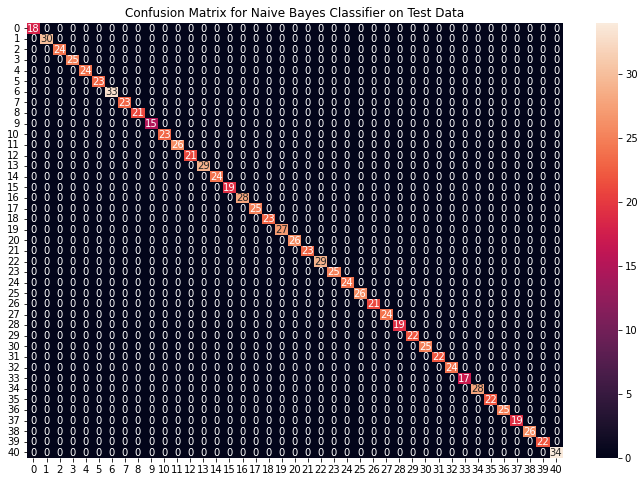

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [34]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [35]:
#Fitting the model NB the Test dataset: 
Test_data = TestingData.drop(["prognosis"],axis=1)
y_testData=TestingData["prognosis"]
test1=TestingData.join(pd.DataFrame(clf.predict(Test_data),columns=["predicted"]))[["prognosis","predicted"]]
test1

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [37]:
accuracyTest = accuracy_score(y_testData, clf.predict(Test_data))
print("accuracyTest: {:.2f}%".format(accuracyTest*100))

accuracyTest: 100.00%


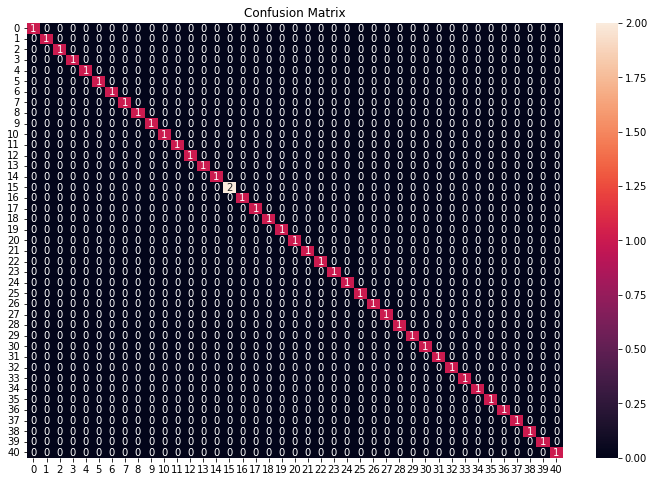

In [38]:
cf_matrix_test1 = confusion_matrix(y_testData, clf.predict(Test_data))
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_test1, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [39]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred2 = classifier.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy2*100))

Accuracy: 100.00%


In [41]:
prediction2 = classifier.predict(new_data)
print('Predicted disease:', prediction2[3])

Predicted disease: AIDS


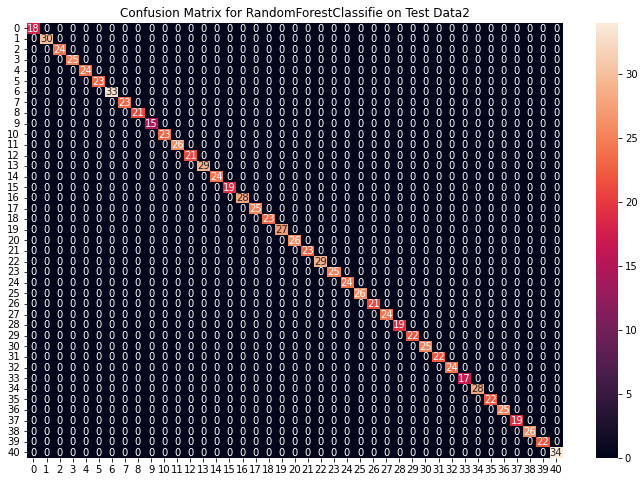

In [42]:
cf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix2, annot=True)
plt.title("Confusion Matrix for RandomForestClassifie on Test Data2")
plt.show()

In [43]:
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [44]:
#Fitting the model RandomForestClassifier the Test dataset: 
test2=TestingData.join(pd.DataFrame(classifier.predict(Test_data),columns=["predicted"]))[["prognosis","predicted"]]
test2

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [45]:
accuracyTest2 = accuracy_score(y_testData, classifier.predict(Test_data))
print("accuracyTest2: {:.2f}%".format(accuracyTest2*100))

accuracyTest2: 97.62%


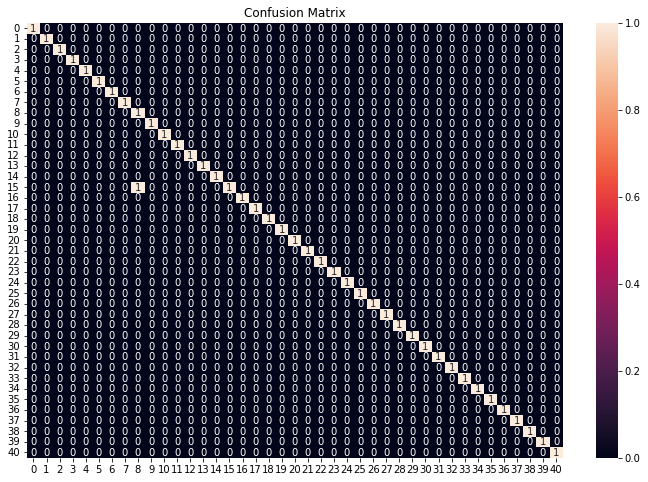

In [46]:
cf_matrix_test2 = confusion_matrix(y_testData, classifier.predict(Test_data))
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_test2, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [47]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred3 = svm_model.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy: {:.2f}%".format(accuracy3*100))

Accuracy: 100.00%


In [48]:
test3=TestingData.join(pd.DataFrame(svm_model.predict(Test_data),columns=["predicted"]))[["prognosis","predicted"]]
test3


,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [49]:
accuracyTest3 = accuracy_score(y_testData, svm_model.predict(Test_data))
print("accuracyTest3: {:.2f}%".format(accuracyTest3*100))

accuracyTest3: 100.00%


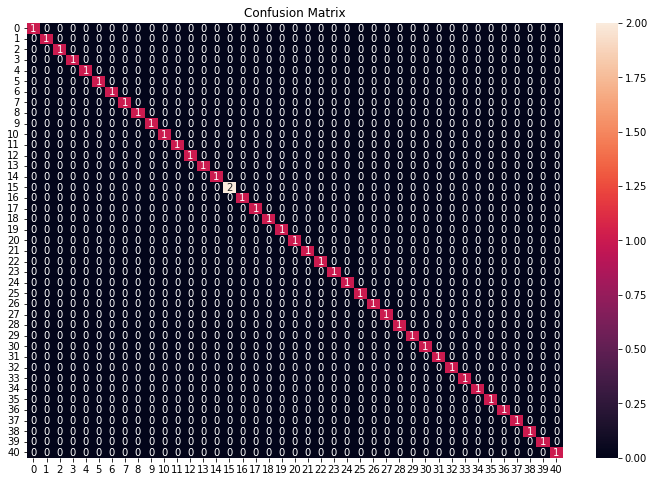

In [50]:
cf_matrix_test3 = confusion_matrix(y_testData, svm_model.predict(Test_data))
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_test3, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [51]:
#even one of the models makes wrong predictions 
#and the other two make correct predictions then the final output would be the correct one
#we conclude that RandomForestClassifier is doesnt predict good enough for our data
#Overfitting happens when:
#1-The data used for training is not cleaned and contains garbage values. The model captures the noise in the training data and fails to generalize the model's learning.
#2-The model has a high variance.
#3-The training data size is not enough, and the model trains on the limited training data for several epochs.
 